# Titanic case study
by Mahitha Anumukonda and Mridul Ahluwalia

### Step 1: Importing data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
train_data = pd.read_csv("train.csv")

In [4]:
test_data = pd.read_csv("test.csv")

In [5]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Setp 2: Inspecting the dataframe

In [8]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
round(100*(train_data.isnull().sum()/len(train_data.index)), 2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

#### Looking at unique values of categorical variable

In [11]:
train_data.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [12]:
train_data.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [13]:
train_data.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

### Step 3: Data Preparation

#### Converting some binary variables (male/female) to 0/1

In [14]:
# Defining the map function
def binary_map(x):
    if 'female' == x:
        return 1
    return 0

# Applying the function to the training data set
train_data['Sex'] = train_data['Sex'].apply(binary_map)

In [15]:
# Dropping PassengerId, Name as it does not crontibute to analysis
train_data = train_data.drop(['PassengerId', 'Name'], 1)

In [16]:
# Imputing missing values for Embarked with most common values
train_data.Embarked.value_counts()
train_data["Embarked"].fillna("S", inplace = True)  

In [17]:
# Defining the map function
def extract_cabin(x):
    if isinstance(x, str): x = x[0]
    return x

# Applying the function to the training data set
train_data['Cabin'] = train_data['Cabin'].apply(extract_cabin)

In [18]:
train_data.Cabin.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [19]:
# Dropping ticket and Cabin for now as they have too many unique values
train_data = train_data.drop(['Ticket', 'Cabin'], 1)

In [20]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


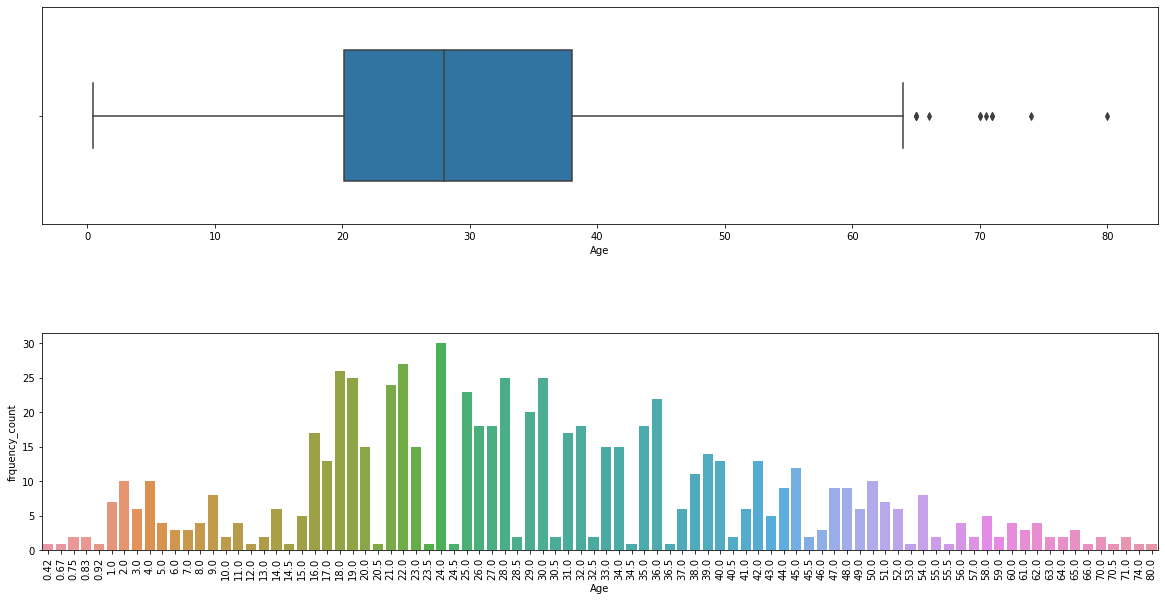

In [21]:
# Impute missing values for Age
fig, ax = plt.subplots(2, 1, figsize=(20,10))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

fig1 = sns.countplot(train_data.Age, ax=ax[1])
fig1.set(ylabel='frquency_count')
fig1.set_xticklabels(fig1.get_xticklabels(),rotation=90)

fig2 = sns.boxplot(train_data.Age, ax=ax[0], orient='h', width=.6)
pass

In [22]:
# Impute missing values of age with median
train_data["Age"].fillna(train_data.Age.median(), inplace = True)

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [23]:
# Creating a dummy variable for categorical variables
dummy = pd.get_dummies(train_data['Embarked'], prefix='Embarked')

# Adding the results to the master dataframe
train_data = pd.concat([train_data, dummy], axis=1)

# Dropping original column
train_data.drop(['Embarked'], axis=1, inplace=True)

In [24]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1


In [25]:
train_data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208,0.188552,0.086420,0.725028
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.391372,0.281141,0.446751
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


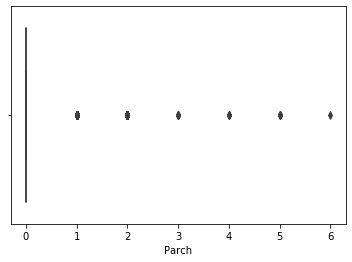

In [26]:
# Looking for outliers
fig1 = sns.boxplot(train_data.Parch)
pass

In [27]:
train_data.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

### Step 4: Test-Train Split

In [28]:
y = train_data.pop('Survived')
X = train_data

In [29]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature scaling

In [30]:
scaler = StandardScaler()
var_list = ['Pclass','Age','Fare']
X_train[var_list] = scaler.fit_transform(X_train[var_list])
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
69,0.843816,0,-0.283098,2,0,-0.462475,0,0,1
85,0.843816,1,0.261554,3,0,-0.324753,0,0,1
794,0.843816,0,-0.360906,0,0,-0.477166,0,0,1
161,-0.345544,1,0.806207,0,0,-0.326669,0,0,1
815,-1.534905,0,-0.127483,0,0,-0.628459,0,0,1


### Step 6: Looking at Correlations

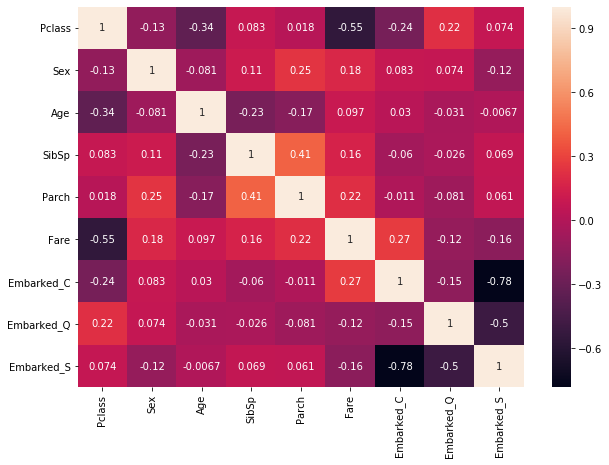

In [31]:
# Let's see the correlation matrix 
plt.figure(figsize = (10,7))        # Size of the figure
sns.heatmap(train_data.corr(),annot = True)

# fix for bug that cuts off top/bottom of seaborn graph
bot, top = plt.ylim()
bot += 0.5
top -= 0.5
plt.ylim(bot, top)
pass

#### Dropping highly correlated dummy variables

In [32]:
X_train = X_train.drop(['Embarked_S'], 1)

### Step 7: Model Building

In [33]:
class LogisticRegressionModel:
    
    def __init__(self, y_train, X_train):
        self.y_train = y_train
        self.X_train = X_train
                
    def get_logit_summary(self):
        self.X_train_sm = sm.add_constant(self.X_train)
        logm = sm.GLM(self.y_train, self.X_train_sm, family=sm.families.Binomial())
        self.res = logm.fit()
        print(self.res.summary())
        
    def get_vif_summary(self):
        vif = pd.DataFrame()
        vif['Features'] = self.X_train.columns
        vif['VIF'] = [variance_inflation_factor(self.X_train.values, i)\
                      for i in range(self.X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by="VIF", ascending=False)
        print(vif)
        
    def get_model_summary(self):
        self.get_logit_summary()
        self.get_vif_summary()
        
    def drop_feature(self, feature):
        self.X_train = self.X_train.drop([feature], 1)
        
    def get_predict_prob_df(self, cutoff):
        self.y_train_pred = self.res.predict(self.X_train_sm)
        self.y_train_pred = self.y_train_pred.values.reshape(-1)
        self.y_train_pred_final = pd.DataFrame(
            {'Survived':self.y_train.values, 'Survived_Prob':self.y_train_pred})
        self.y_train_pred_final['predicted'] = self.y_train_pred_final.Survived_Prob.map(
            lambda x: 1 if x > cutoff else 0)
        print(self.y_train_pred_final.head())
        
    def get_confusion_matrix(self):
        confusion = metrics.confusion_matrix(
            self.y_train_pred_final.Survived, self.y_train_pred_final.predicted)
        self.TP = confusion[1,1] # true positive 
        self.TN = confusion[0,0] # true negatives
        self.FP = confusion[0,1] # false positives
        self.FN = confusion[1,0] # false negatives
        print(confusion)
        
    def get_sensitvity_specificity(self):
        sensitivity = round(self.TP/float(self.TP+self.FN),4)*100
        specificity = round(self.TN/float(self.TN+self.FP),4)*100
        print(f'Sensitivity: {sensitivity}')
        print(f'Specificity: {specificity}')
        
    def get_model_accuray(self):
        print(round(metrics.accuracy_score(
            self.y_train_pred_final.Survived, self.y_train_pred_final.predicted), 4)*100)
        
    def draw_roc(self):
        actual = self.y_train_pred_final.Survived
        probs = self.y_train_pred_final.Survived_Prob
        fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
        auc_score = metrics.roc_auc_score(actual, probs)
        plt.figure(figsize=(5, 5))
        plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example')
        plt.legend(loc="lower right")
        plt.show()
        
    def find_optimal_cutoff_points(self):
        for i in [float(x)/10 for x in range(10)]:
            self.y_train_pred_final[i]= self.y_train_pred_final.Survived_Prob.map(
                lambda x: 1 if x > i else 0)
        cutoff_df = pd.DataFrame(columns=['prob','accuracy','sensi','speci'])
        num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
        for i in num:
            cm1 = metrics.confusion_matrix(
                self.y_train_pred_final.Survived, self.y_train_pred_final[i])
            total1=sum(sum(cm1))
            accuracy = (cm1[0,0]+cm1[1,1])/total1
            speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
            sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
            cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
        print(cutoff_df)
        cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
        plt.show()

In [34]:
lrm = LogisticRegressionModel(y_train, X_train)

In [35]:
cutoff = 0.38

#### Model 1

In [36]:
lrm.get_model_summary()

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  623
Model:                            GLM   Df Residuals:                      614
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -269.20
Date:                Sat, 11 Apr 2020   Deviance:                       538.40
Time:                        18:16:11   Pearson chi2:                     641.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5748      0.172     -9.131      0.0

In [37]:
lrm.get_predict_prob_df(cutoff)

   Survived  Survived_Prob  predicted
0         0       0.056709          0
1         1       0.391993          1
2         0       0.097899          0
3         1       0.765934          1
4         0       0.441442          1


In [38]:
lrm.get_model_accuray()

78.33


#### Model 2

In [39]:
lrm.drop_feature('Embarked_Q')

In [40]:
lrm.get_model_summary()

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  623
Model:                            GLM   Df Residuals:                      615
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -269.20
Date:                Sat, 11 Apr 2020   Deviance:                       538.40
Time:                        18:16:11   Pearson chi2:                     641.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5742      0.167     -9.399      0.0

In [41]:
lrm.get_predict_prob_df(cutoff)

   Survived  Survived_Prob  predicted
0         0       0.056736          0
1         1       0.392224          1
2         0       0.097972          0
3         1       0.766117          1
4         0       0.441404          1


In [42]:
lrm.get_model_accuray()

78.33


#### Model 3

In [43]:
lrm.drop_feature('Fare')

In [44]:
lrm.get_model_summary()

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  623
Model:                            GLM   Df Residuals:                      616
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -269.80
Date:                Sat, 11 Apr 2020   Deviance:                       539.61
Time:                        18:16:11   Pearson chi2:                     643.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6174      0.163     -9.924      0.0

In [45]:
lrm.get_predict_prob_df(cutoff)

   Survived  Survived_Prob  predicted
0         0       0.056921          0
1         1       0.391725          1
2         0       0.095405          0
3         1       0.770615          1
4         0       0.480809          1


In [46]:
lrm.get_model_accuray()

78.49000000000001


#### Model 4

In [47]:
lrm.drop_feature('Parch')

In [48]:
lrm.get_model_summary()

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  623
Model:                            GLM   Df Residuals:                      617
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -270.84
Date:                Sat, 11 Apr 2020   Deviance:                       541.69
Time:                        18:16:11   Pearson chi2:                     649.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6395      0.163    -10.080      0.0

In [49]:
lrm.get_predict_prob_df(cutoff)

   Survived  Survived_Prob  predicted
0         0       0.049777          0
1         1       0.330597          0
2         0       0.093399          0
3         1       0.755404          1
4         0       0.473177          1


In [50]:
lrm.get_model_accuray()

78.64999999999999


#### Model 5

In [51]:
lrm.drop_feature('Embarked_C')

In [52]:
lrm.get_model_summary()

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  623
Model:                            GLM   Df Residuals:                      618
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -272.21
Date:                Sat, 11 Apr 2020   Deviance:                       544.41
Time:                        18:16:11   Pearson chi2:                     657.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5516      0.152    -10.220      0.0

In [53]:
lrm.get_predict_prob_df(cutoff)

   Survived  Survived_Prob  predicted
0         0       0.051028          0
1         1       0.333283          0
2         0       0.097995          0
3         1       0.773478          1
4         0       0.512519          1


In [54]:
lrm.get_model_accuray()

78.81


### Metrics beyond simply accuracy

In [55]:
lrm.get_confusion_matrix()

[[308  82]
 [ 50 183]]


In [56]:
lrm.get_sensitvity_specificity()

Sensitivity: 78.53999999999999
Specificity: 78.97


### Step 8: Plotting the ROC Curve

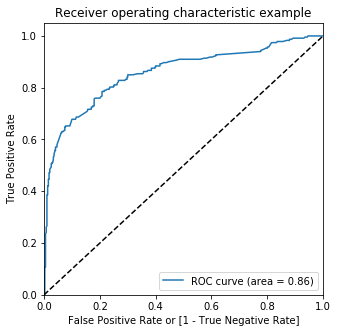

In [57]:
lrm.draw_roc()

### Step 9: Finding Optimal Cutoff Point

     prob  accuracy     sensi     speci
0.0   0.0  0.373997  1.000000  0.000000
0.1   0.1  0.608347  0.914163  0.425641
0.2   0.2  0.717496  0.866953  0.628205
0.3   0.3  0.768860  0.828326  0.733333
0.4   0.4  0.784912  0.763948  0.797436
0.5   0.5  0.791332  0.716738  0.835897
0.6   0.6  0.818620  0.635193  0.928205
0.7   0.7  0.796148  0.497854  0.974359
0.8   0.8  0.767255  0.399142  0.987179
0.9   0.9  0.698234  0.201717  0.994872


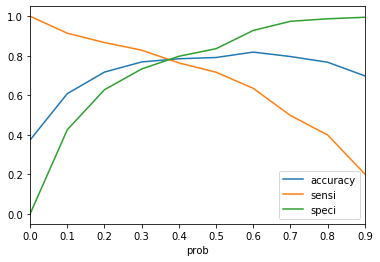

In [58]:
lrm.find_optimal_cutoff_points()

### Step 10: Making predictions on the test set